In [13]:
import sjldpm
from sjldpm.apps.cond.try_cond_1 import *
import importlib
importlib.reload(sjldpm.apps.cond.try_cond_1)
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

In [2]:
from sjldpm.apps.reference.ddpm2_h import imread,list_pictures

In [3]:
def show_image(path):
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

def show_image2(path1,path2):
    img1 = mpimg.imread(path1)
    img2 = mpimg.imread(path2)
    fig,axes= plt.subplots(1,2)
    axes[0].imshow(img1)
    axes[1].imshow(img2)
    plt.show()

def to_displayable_img(img):
    return cv2.cvtColor( (img/2+0.5).astype(np.float32), cv2.COLOR_BGR2RGB)


In [9]:
gpuid = 0
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpuid}"
log_dir = use_log_dir(sjldpm,cfn,"loadPretrained",0)
# ------------------


/home/yumeng/workspace/DDPM-SuJL/sjldpm/apps/cond/Human Faces Generated by AI - Microstock Posts.jpg
cond_img: (128, 128, 3) <class 'numpy.ndarray'> -0.9529412 0.9764706


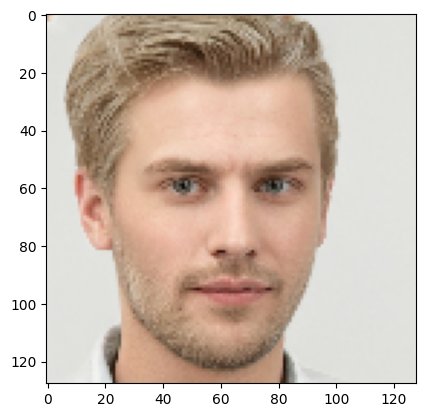

In [4]:
cfp = Path(sjldpm.apps.cond.try_cond_1.__file__).parent
path_cond_img = Path(cfp,"Human Faces Generated by AI - Microstock Posts.jpg").as_posix()
print(path_cond_img )
cond_img = imread(path_cond_img, (128,128))
print("cond_img:", cond_img.shape, type(cond_img),cond_img.min(),cond_img.max())
plt.imshow(cv2.cvtColor(cond_img/2+0.5, cv2.COLOR_BGR2RGB))
plt.show()

[[0.10677147 0.83408054 0.49741074 ... 0.11416915 0.27564644 0.32781776]
 [0.40779207 0.09045191 0.34967345 ... 0.20596986 0.75934651 0.1750794 ]
 [0.14849288 0.62988291 0.921272   ... 0.95338922 0.54408116 0.89179875]
 ...
 [0.53173686 0.7182844  0.5516411  ... 0.15242434 0.6555959  0.58669079]
 [0.60821758 0.01789828 0.12411743 ... 0.08170413 0.28952055 0.68966882]
 [0.45911343 0.05759135 0.5432746  ... 0.4349807  0.53723724 0.5479085 ]]
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 1. 1.]]
drop_rate= 0.501708984375


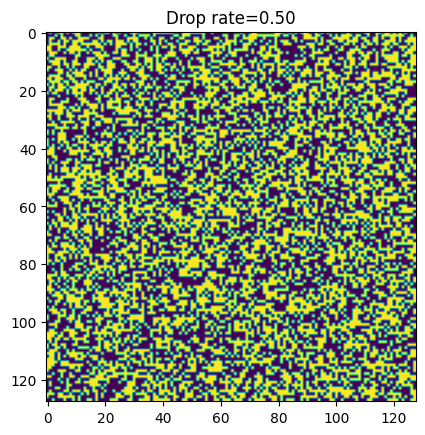

In [12]:
_msk = np.random.rand(128,128)
print(_msk)
mask_pixel = np.ones((128,128))
mask_pixel[_msk<0.5] = 0
print(mask_pixel)
rate = 1- mask_pixel.sum()/mask_pixel.size
print("drop_rate=",rate)

plt.imshow(mask_pixel)
plt.title(f"Drop rate={rate:.2f}")
plt.show()


In [ ]:
def iterative_average(masked_image, mask, kernel, n_iter=10, strength = 0.5):
    np.convolve(
    for m in range(n_iter):
        pass
    

External image as condition
Stride: 25 Eta: 1
- debug (128, 128, 3) -0.9372549057006836 0.9764705896377563


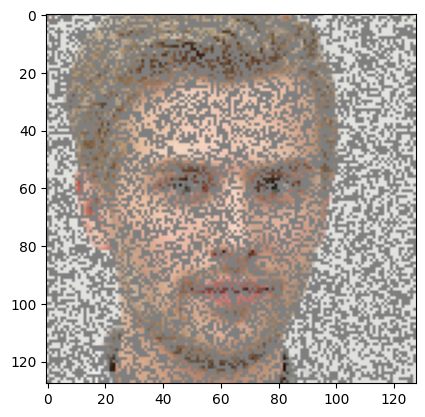

In [10]:
def demo_tra_mk1(title,cond_img,mask_pixel,cond_weight,stride,eta,path_save):
    print(title)
    print("Stride:",stride,"Eta:",eta)
    cond_img_masked= cond_img * mask_pixel.reshape(*mask_pixel.shape,1)
    print("- debug", cond_img_masked.shape,cond_img_masked.min(),cond_img_masked.max() )
    plt.imshow(cv2.cvtColor( (cond_img_masked/2+0.5).astype(np.float32), cv2.COLOR_BGR2RGB))

demo_tra_mk1("External image as condition",cond_img,mask_pixel,0.1,25,1,Path(log_dir,"cond_tra_mk1.png"))